# Decision Tree Classification-Company Dataset

## Data Dictionary

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:/Users/delll/Desktop/Python/DataSets/company_data.xls")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.shape

(400, 11)

In [4]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.Sales.unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [7]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
for i in df["Sales"]:
    if i>8:
        df["Sales"]=np.where(df["Sales"]==i,1,df["Sales"])
    else:
        df["Sales"]=np.where(df["Sales"]==i,0,df["Sales"])

In [10]:
df.Sales.value_counts()

0.0    236
1.0    164
Name: Sales, dtype: int64

In [11]:
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())
    print("-"*50)

ShelveLoc
['Bad' 'Good' 'Medium']
--------------------------------------------------
Urban
['Yes' 'No']
--------------------------------------------------
US
['Yes' 'No']
--------------------------------------------------


In [12]:
for col in df.describe().columns:
    print(col)
    print(df[col].unique())
    print("-"*50)

Sales
[1. 0.]
--------------------------------------------------
CompPrice
[138 111 113 117 141 124 115 136 132 121 122 107 149 118 147 110 129 125
 134 128 145 139  98 103 104 114 131 109 130 119 157  77 123  85 127 126
 116  99 153 143 133  93 105 100  89 148 150  88 102 151  97 161 135 112
  94 108  96 146 140 144 142 106 137 120 156 155 162  86 159  95 175 154
 152]
--------------------------------------------------
Income
[ 73  48  35 100  64 113 105  81 110  78  94  28 117  95  32  74  76  90
  29  46  31 119 115 118  99  58  38  54  84  41  60  98  53  69  42  79
  63  52  93  40 103  82  91  71 102  45  88  67  26  92  61  59  51  68
 111  87  72  83  36  25  66  22  30  97  77  47  96  33 107  65  62  75
  89 120  34  21  39 106  24 112  37  70  80  44 104  43  56 114  57  86
  50  27 101 109  55 116 108  23]
--------------------------------------------------
Advertising
[11 16 10  4  3 13  0 15  9  2  5 12  6 14 18 19 20 23  1  7 24  8 17 25
 26 29 22 21]
--------------------

Text(0.5, 1.0, 'Shelve Location')

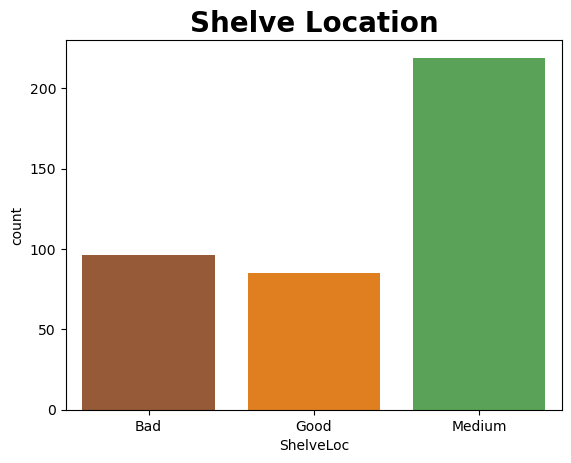

In [50]:
sns.countplot(data = df, x = 'ShelveLoc',  palette='Set1_r')
plt.title('Shelve Location',fontweight="bold", size=20)

Text(0.5, 1.0, 'Customers in Urban Area')

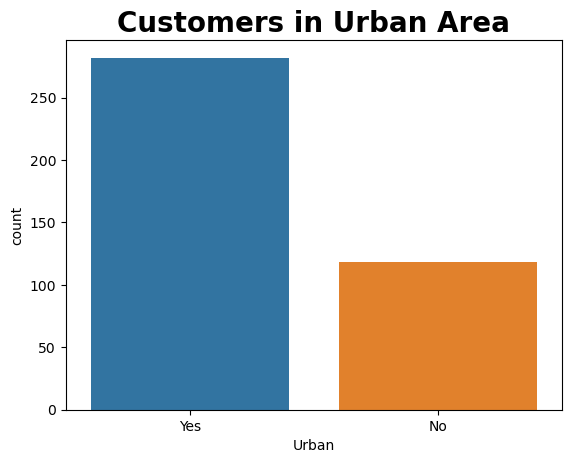

In [52]:
sns.countplot(data = df, x = 'Urban')
plt.title('Customers in Urban Area',fontweight="bold", size=20)

Text(0.5, 1.0, 'Customer from US')

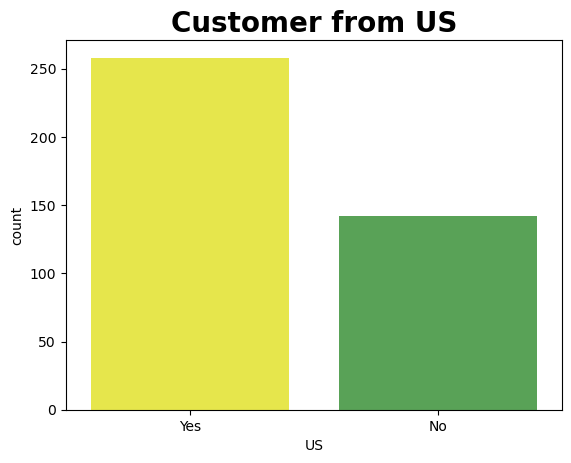

In [49]:
sns.countplot(data = df, x = 'US',  palette='Set1_r')
plt.title('Customer from US',fontweight="bold", size=20)

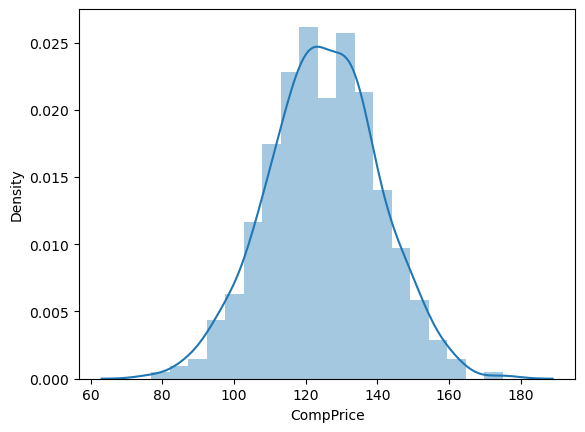

In [17]:
sns.distplot(df["CompPrice"])
plt.show()
# data is normal

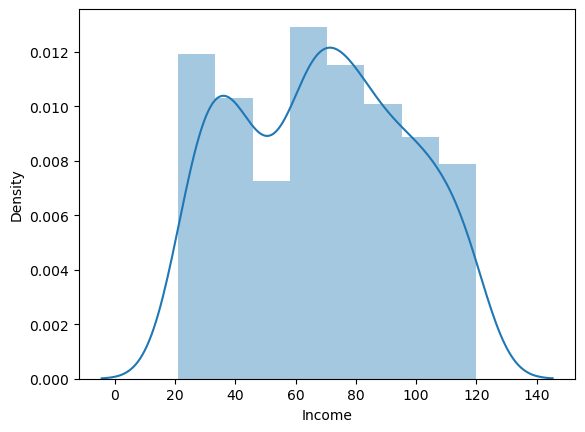

In [18]:
sns.distplot(df["Income"])
plt.show()
# data is right skewed

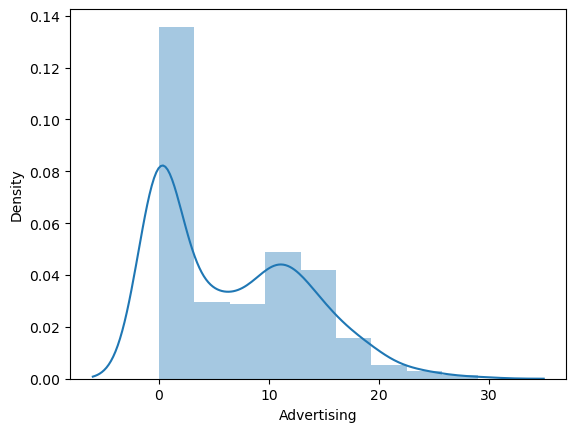

In [19]:
sns.distplot(df["Advertising"])
plt.show()
# data is right skewed

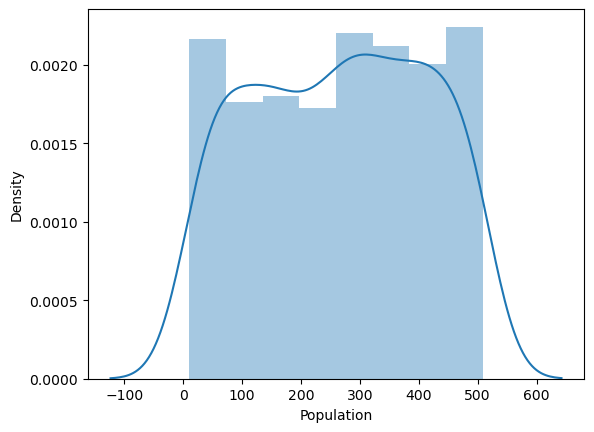

In [20]:
sns.distplot(df["Population"])
plt.show()
# data is normal distribution

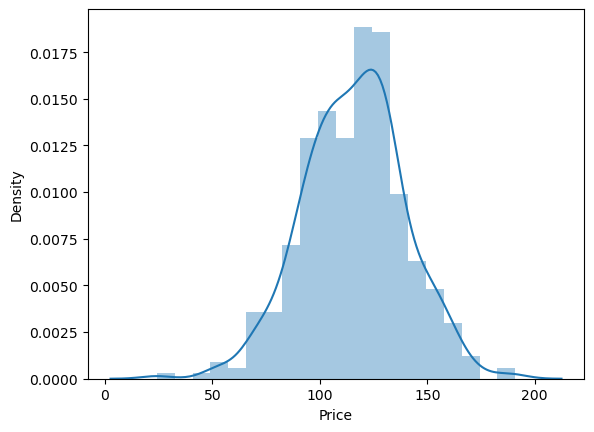

In [21]:
sns.distplot(df["Price"])
plt.show()
# data is slightly normal distribution

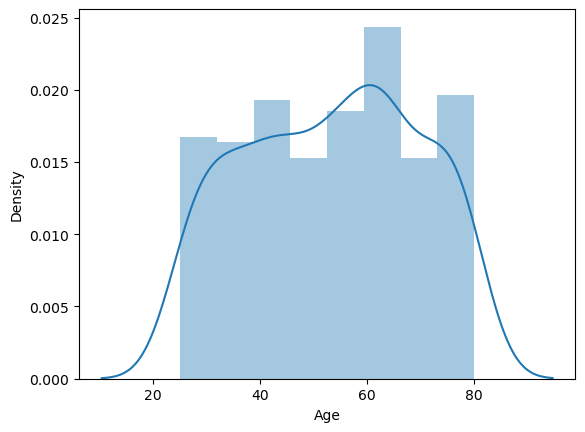

In [22]:
sns.distplot(df["Age"])
plt.show()
# data is slightly normal distribution

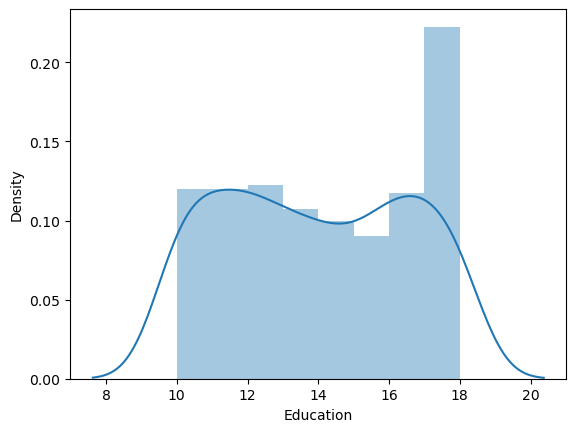

In [23]:
sns.distplot(df["Education"])
plt.show()
# data is slightly normal distribution

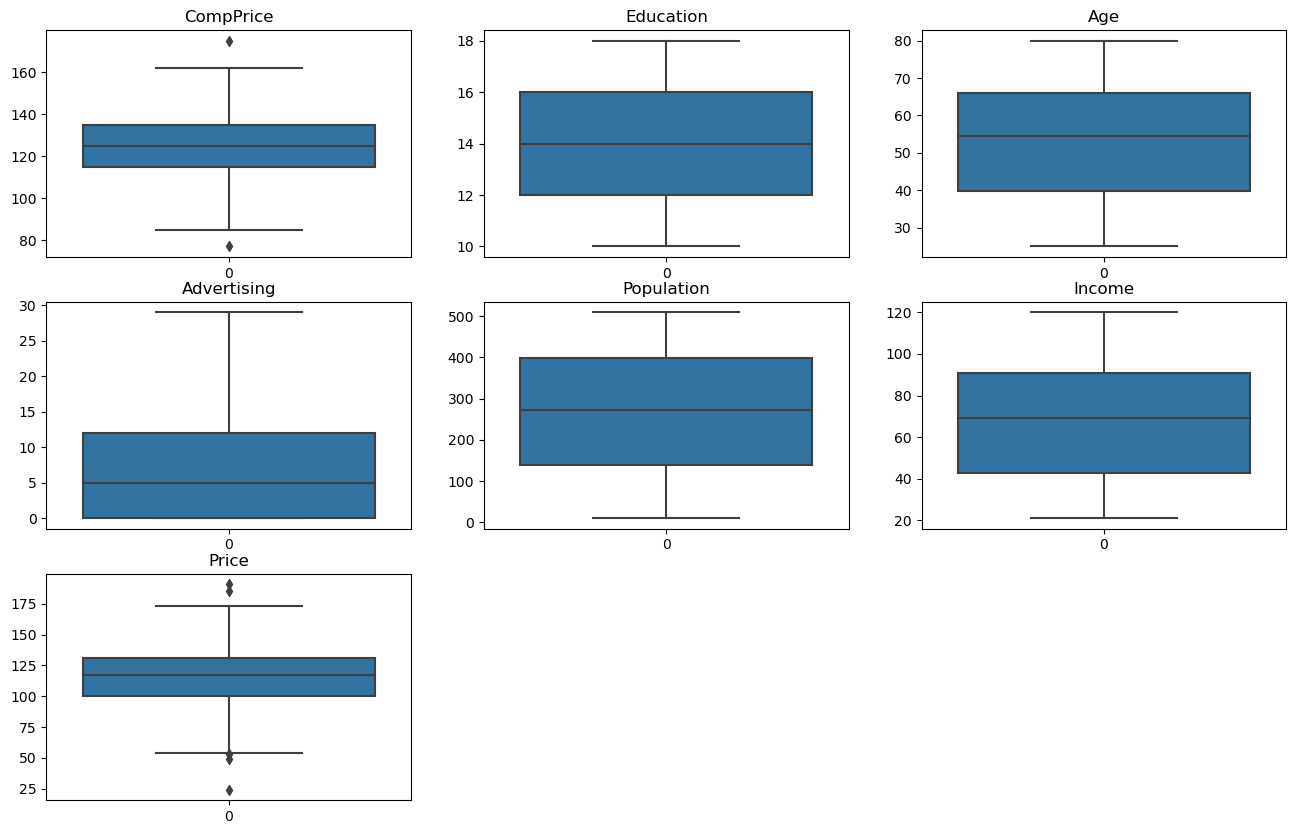

In [25]:
plt.figure(figsize=(16,10))

plt.subplot(3,3,1)
sns.boxplot(df["CompPrice"])
plt.title("CompPrice")

plt.subplot(3,3,2)
sns.boxplot(df["Education"])
plt.title("Education")

plt.subplot(3,3,3)
sns.boxplot(df["Age"])
plt.title("Age")

plt.subplot(3,3,4)
sns.boxplot(df["Advertising"])
plt.title("Advertising")

plt.subplot(3,3,5)
sns.boxplot(df["Population"])
plt.title("Population")

plt.subplot(3,3,6)
sns.boxplot(df["Income"])
plt.title("Income")

plt.subplot(3,3,7)
sns.boxplot(df["Price"])
plt.title("Price")
plt.show()
# only compprice and price col have outliers

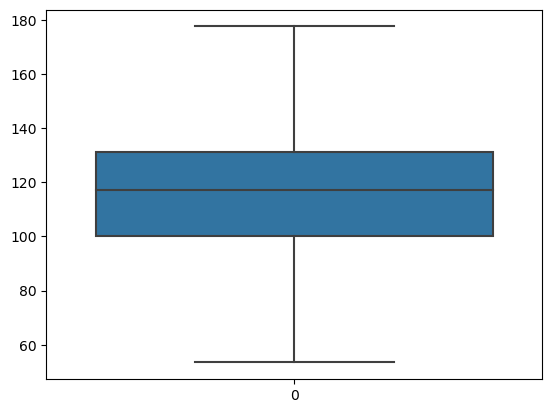

In [27]:
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="Price",tail="both")
df["Price"]=winsor.fit_transform(df[["Price"]])
sns.boxplot(df["Price"])
plt.show()

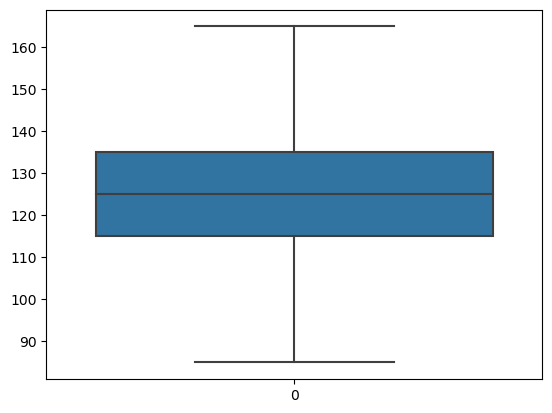

In [29]:
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="CompPrice",tail="both")
df["CompPrice"]=winsor.fit_transform(df[["CompPrice"]])
sns.boxplot(df["CompPrice"])
plt.show()
# OUTLIERS ARE REMOVED

In [30]:
inputs=df.drop(["Sales"],axis=1)

In [31]:
target=df["Sales"]

In [32]:
lb=LabelEncoder()

In [33]:
inputs["ShelveLoc"]=lb.fit_transform(inputs["ShelveLoc"])
inputs["Urban"]=lb.fit_transform(inputs["Urban"])
inputs["US"]=lb.fit_transform(inputs["US"])

In [34]:
inputs.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120.0,0,42,17,1,1
1,111,48,16,260,83.0,1,65,10,1,1
2,113,35,10,269,80.0,2,59,12,1,1
3,117,100,4,466,97.0,2,55,14,1,1
4,141,64,3,340,128.0,0,38,13,1,0


In [38]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
inputs=pd.DataFrame(std.fit_transform(inputs))
inputs.head()

,0,1,2,3,4,5,6,7,8,9
0,0.858149,0.155361,0.657177,0.075819,0.179646,-1.570698,-0.699782,1.184449,0.646869,0.741881
1,-0.920057,-0.739060,1.409957,-0.032882,-1.413859,-0.369399,0.721723,-1.490113,0.646869,0.741881
2,-0.788338,-1.204159,0.506621,0.028262,-1.543062,0.831899,0.350895,-0.725953,0.646869,0.741881
3,-0.524900,1.121336,-0.396715,1.366649,-0.810911,0.831899,0.103677,0.038208,0.646869,0.741881
4,1.055727,-0.166631,-0.547271,0.510625,0.524188,-1.570698,-0.947000,-0.343872,0.646869,-1.347925


In [39]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [40]:
model=DT()

In [41]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred=model.predict(x_test)
y_pred

array([1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.])

In [43]:
acc=accuracy_score(y_test,y_pred)
acc
# Overall accuracy of descision tree model is 86%.

0.8625

## End of the Assignment